Use *wdwarfdate* estimate a white dwarf age 
=====================================

In this tutorial we are going to estimate the ages of two white dwarfs using *wdwarfdate*. We are going to start by importing all the packages we are going to need

In [1]:
#import wdwarfdate 
import sys
sys.path.append('/Users/rociokiman/Documents/wdwarfdate')
import wdwarfdate
import numpy as np
import time

We are going to set up the white dwarfs's effective temperatures and surface gravity obtained from Cummings,J.D. et al. 2018.

In [2]:
#Define data for the white dwarf
teffs = np.array([19250,20250])
teffs_err = np.array([500,850])
loggs = np.array([8.16,8.526])
loggs_err = np.array([0.084,0.126])

Now we run the age estimation using *wdwarfdate* method and record the time it takes to run. We are going to explicitly indicate the models we wanted to use:

1) `model_wd = 'DA'`, for spectral type of the white dwarf.

2) `model_ifmr = 'Cummings_2018_MIST'`, for the initial-to-final mass relation.

3) `feh = 'p0.00'` and `vvcrit='0.0'`, for the isochrone of the progenitor star.

These are the default models so we do not need to do it in this case, but we will write them down to be clear. For a list of the models that can be used with *wdwarfdate*, go the page Models included in the documentation.
The rest of the parameters we are going to specify:

1) `high_perc = 84, low_perc = 16`: high and low percentiles we want to use to calculate the errors for each parameter. 

2) `data_type = 'Gyr'`: units of the resulting ages. This can be yr, Gyr or log. 

3) `save_plots = True`: With this parameter we decide to save the resulting plots. 

4) `display_plots=True`: With this parameter we decide to display the resulting plots in jupyter notebook.

Running teff:19250 logg:8.16
0 steps out of 1000
Converged


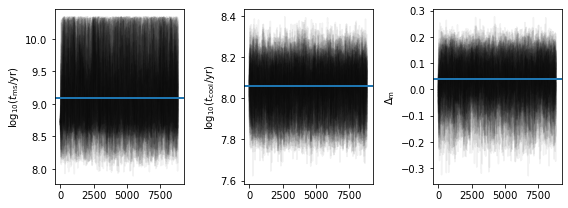

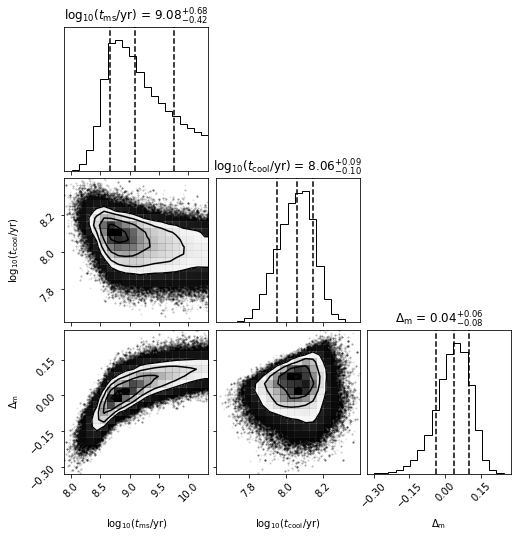

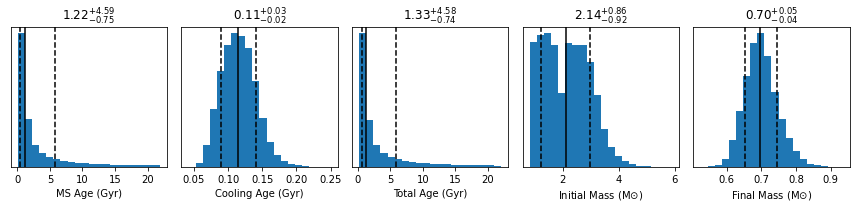

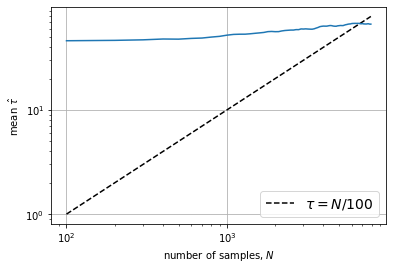

Running teff:20250 logg:8.526
0 steps out of 1000
Converged


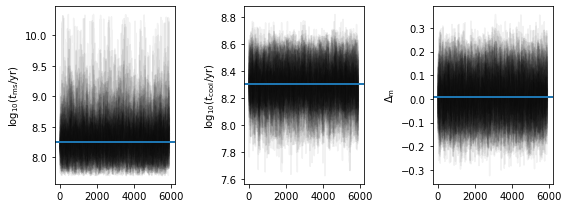

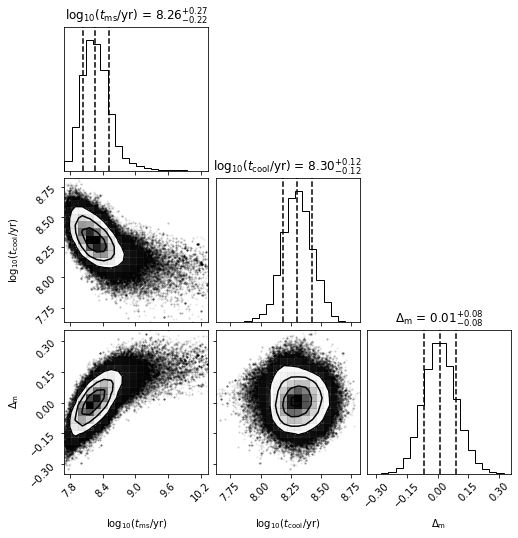

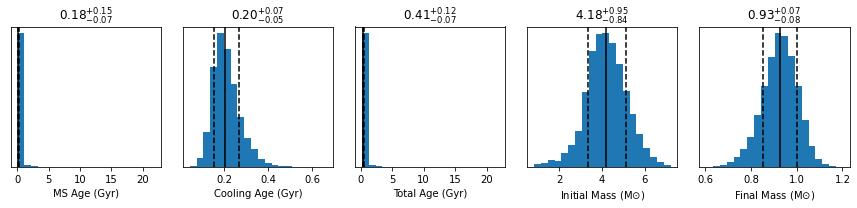

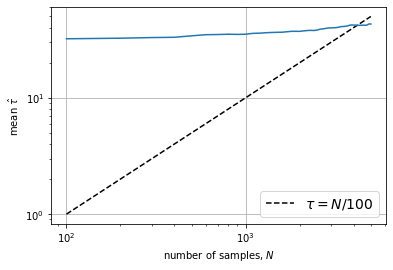

13.549034635225931m


In [3]:
start = time.time()
WD = wdwarfdate.WhiteDwarf(teffs,teffs_err,loggs,loggs_err,
                           model_wd='DA',feh='p0.00',vvcrit='0.0',
                           model_ifmr = 'Cummings_2018_MIST', 
                           high_perc = 84, low_perc = 16,
                           datatype='Gyr', 
                           save_plots=False, display_plots=True)
WD.calc_wd_age()
end = time.time()
print('{}m'.format((end - start)/60))

In [4]:
WD.results

ms_age_median,ms_age_err_low,ms_age_err_high,cooling_age_median,cooling_age_err_low,cooling_age_err_high,total_age_median,total_age_err_low,total_age_err_high,initial_mass_median,initial_mass_err_low,initial_mass_err_high,final_mass_median,final_mass_err_low,final_mass_err_high
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.2151601442758646,0.7535026988444212,4.588424238572287,0.11465077088038664,0.024602180881633212,0.025519019280739713,1.329698017788399,0.7433994887468099,4.577665301598392,2.135621482146588,0.9191096789216313,0.8601785740465915,0.6972514351520018,0.043293093565889174,0.048658732750936906
0.1818835495208181,0.0731865841176621,0.15330969737257738,0.2016930885371288,0.048032509865250705,0.06662960477836882,0.40655965395995053,0.0732370633564246,0.12205161938088338,4.184434457816044,0.8379474040673713,0.946247016428508,0.9284169105707856,0.07693391826020468,0.07196963816091739


The option `save_plots = True` will save several files to a folder called 'results', or any path we choose using the `path` parameter. Below we describe each of the files *wdwarfdate* method creates. In the case `save_plots = False`, but `display_plots = True`, the same plots will be displayed on jupyter notebook, but they will not be saved. In order of appearence (above):

1) "results/teff_19250_logg_8.16_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_walkers": traces for each walker to confirm convergence. 

2) "results/teff_19250_logg_8.16_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_corner_plot.png": corner plot for the three independent variables: main sequence age, cooling age and delta m.

3) "results/teff_19250_logg_8.16_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_distributions.png": distribution of all the parameter of the white dwarf: the sampled parameters (main sequence and cooling age) and the dependent parameters (final mass, initial mass and total age). 

4) "results/teff_19250_logg_8.16_feh_p0.00_vvcrit_0.0_DA_Cummings_2018_MIST_corr_time.png": result of the mean auto-correlation time for the three variables as explained in the tutorials for [autocorrelation time](https://emcee.readthedocs.io/en/stable/tutorials/autocorr/)  and [monitoring progress](https://emcee.readthedocs.io/en/stable/tutorials/monitor/) by Dan Foreman-Mackey.

**The fast-test method**

*wdwardate* runs the fast-test method at the beggining to obtain initial conditions for the parameter. This method generates a gaussian distribution for each pair of *teff* and *logg* using the uncertainties as standard deviation, and passes the full distribution through a chain of models to calculate the total age of the white dwarfs, and the rest of the parameters described above. This method is available to use separately, which will take less time and will give a close solution for the parameters. Below we show an example of the fast-test method.

Running teff:19250 logg:8.16


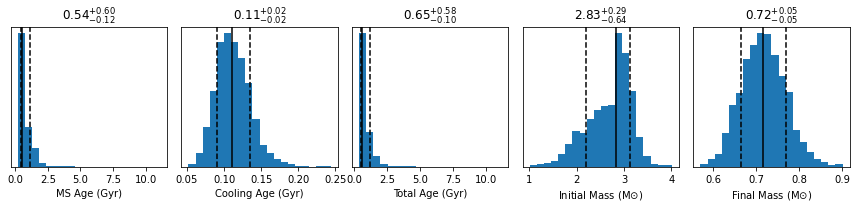

Running teff:20250 logg:8.526


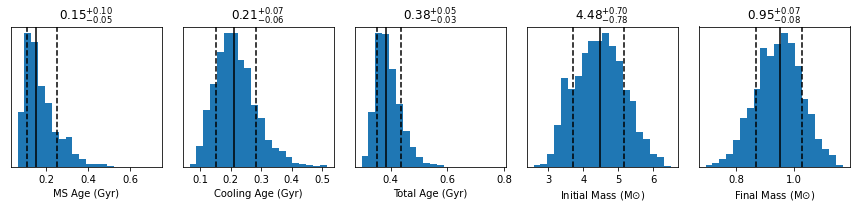

2.474208116531372s


In [5]:
start = time.time()
WD2 = wdwarfdate.WhiteDwarf(teffs,teffs_err,loggs,loggs_err,
                           method='fast_test',
                           model_wd='DA',feh='p0.00',vvcrit='0.0',
                           model_ifmr = 'Cummings_2018_MIST',
                           high_perc = 84, low_perc = 16,
                           datatype='Gyr', return_distributions=True,
                           save_plots=False, display_plots=True)
WD2.calc_wd_age()
end = time.time()
print('{}s'.format(end - start))

The parameters are similar, with the exception of `return_distributions = True`, which will generate that one of the comlumns of the resulting Table of results will have the distributions for each parameter. We can see that this method takes X times less minutes to obtain a result. For a detailed comparison of the two methods, go to the paper describing *wdwarfdate* (Kiman et al. in prep). Also, from the output plots described above, in this method we only get the distributions of the parameters.

In [6]:
WD2.results

ms_age_median,ms_age_err_low,ms_age_err_high,cooling_age_median,cooling_age_err_low,cooling_age_err_high,total_age_median,total_age_err_low,total_age_err_high,initial_mass_median,initial_mass_err_low,initial_mass_err_high,final_mass_median,final_mass_err_low,final_mass_err_high,ms_age_dist [2000],cooling_age_dist [2000],total_age_dist [2000],initial_mass_dist [2000],final_mass_dist [2000]
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.5366267565063021,0.12460062874037098,0.5998831096418591,0.11043470398787801,0.02051756029449185,0.023973218735467136,0.6486959221995084,0.10353921276724998,0.5764437255205611,2.8314893224580264,0.6421528632410185,0.29108548357624775,0.7155191457966421,0.051372229059281516,0.052402342931767265,0.5128566168616419 .. 4.0327548274822735,0.12381252890279316 .. 0.0586165934314761,0.636669145764435 .. 4.091371420913749,2.868817372246666 .. 1.3568440156734571,0.7204688486101266 .. 0.5975475212538766
0.1523396662628434,0.04621267855189348,0.09973607652876332,0.20957647985616035,0.05707664043296873,0.07340894817761096,0.3831872419726018,0.032423787300880136,0.05151702543406128,4.480088306654425,0.775936161720681,0.7003497291577361,0.9503694488120233,0.08302516930411274,0.07493742101987788,0.06302685885204402 .. 0.1510401024429724,0.39593716625205344 .. 0.17635569510616728,0.4589640251040975 .. 0.32739579754913967,6.476921065390811 .. 4.495033278333878,1.1640305539968168 .. 0.9519685607817249
